<a href="https://colab.research.google.com/github/IkireziI/GEN-Z-ACADEMY/blob/main/In%C3%A8s_IKIREZI_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [94]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [96]:

# Load dataset
data = pd.read_csv("/content/e-learning education dataset.csv")


#  initialing state of difficulty_level
print("Before cleaning:")
print("Missing values:", data['difficulty_level'].isna().sum())
print("Value counts:\n", data['difficulty_level'].value_counts(dropna=False))

#  Handle missing values and invalid entries
data['difficulty_level'] = data['difficulty_level'].fillna('Unknown')
valid_categories = ['Beginner', 'Intermediate', 'Advanced']
data = data[data['difficulty_level'].isin(valid_categories + ['Unknown'])]

#
data['difficulty'] = data['difficulty_level'].map({
    'Beginner': 0,
    'Intermediate': 1,
    'Advanced': 1,
    'Unknown': -1
})

data = data[data['difficulty'] != -1]
data = data.drop('difficulty_level', axis=1)


print("\nAfter cleaning:")
print("Missing values in target:", data['difficulty'].isna().sum())
print("Final class distribution:\n", data['difficulty'].value_counts())


# Split features and target
X = data.drop('difficulty', axis=1)
y = data['difficulty']


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_val_processed = scaler.transform(X_val.select_dtypes(include=np.number))
X_test_processed = scaler.transform(X_test.select_dtypes(include=np.number))


print("\nFinal shapes:")
print(f"Training data: {X_train_processed.shape}")
print(f"Validation data: {X_val_processed.shape}")
print(f"Test data: {X_test_processed.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

Before cleaning:
Missing values: 213
Value counts:
 difficulty_level
Beginner        6461
Intermediate    4737
Advanced        2690
NaN              213
Name: count, dtype: int64

After cleaning:
Missing values in target: 0
Final class distribution:
 difficulty
1    7427
0    6461
Name: count, dtype: int64

Final shapes:
Training data: (9721, 9)
Validation data: (2083, 9)
Test data: (2084, 9)
y_train: (9721,), y_val: (2083,), y_test: (2084,)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




In [98]:
!pip install graphviz pydot

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

def build_and_visualize_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu', name='Layer_L1'),
        Dense(32, activation='relu', name='Layer_L2'),
        Dense(16, activation='relu', name='Layer_L3'),
        Dense(1, activation='sigmoid', name='Layer_L4')
    ])

    model.summary()
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    print("Model architecture saved to 'model_architecture.png'")

    return model

input_shape = X_train_processed.shape[1]
model = build_and_visualize_model(input_shape)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer_L1 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_L2 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_L3 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_L4 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Model architecture saved to 'model_architecture.png'


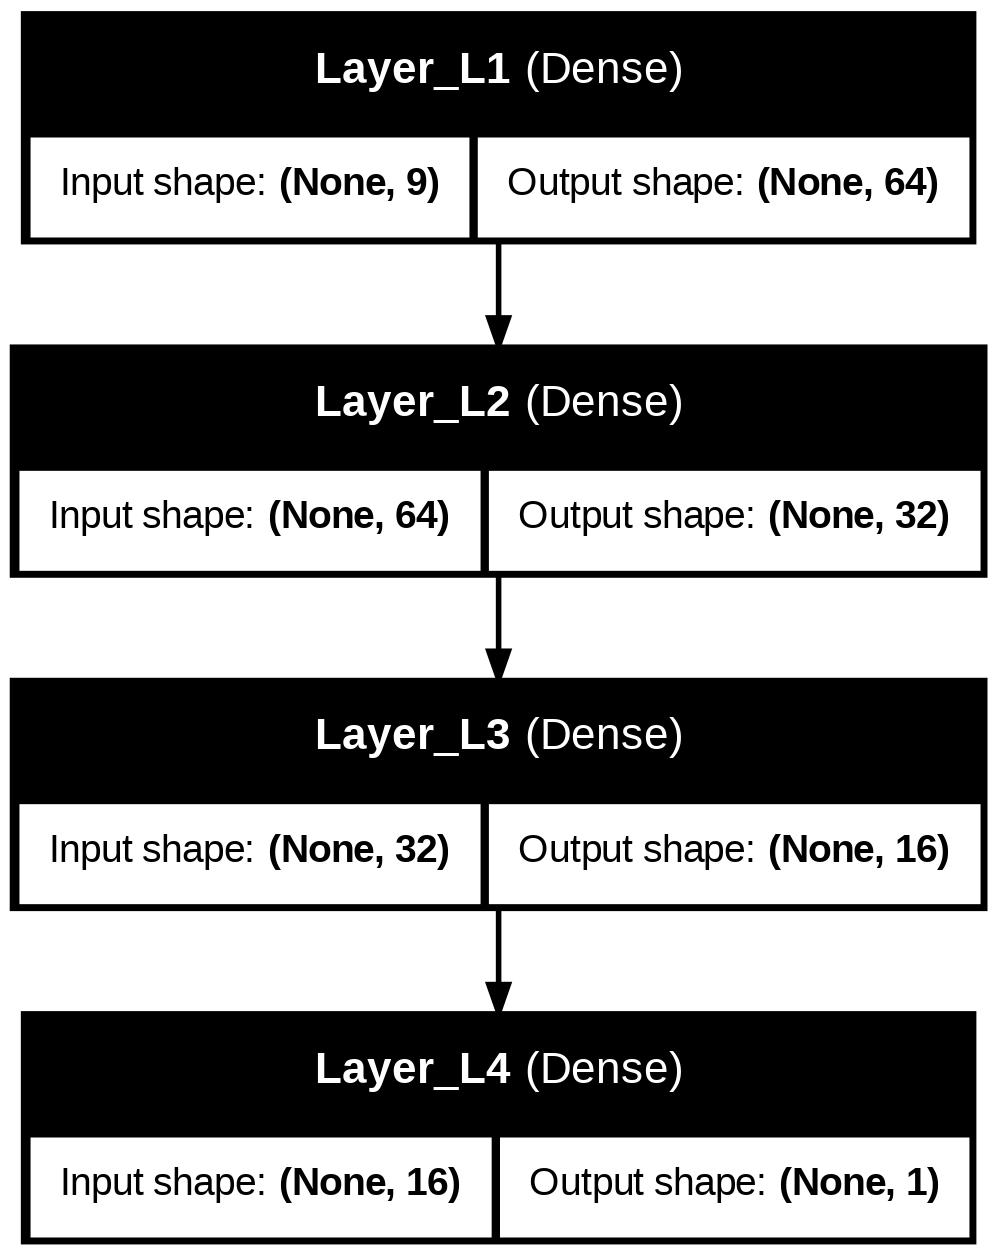

In [103]:
from IPython.display import Image
Image('model_architecture.png')

#Task: Define a function that creates models without and With specified Optimization techniques


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimization: str, regularization_type: str = None,
                early_stopping: bool = False, dropout_rate: float = 0.0,
                learning_rate: float = 0.001):

    model = Sequential()

    # Regularization setup
    reg = None
    if regularization_type == 'l1':
        reg = l1(0.01)
    elif regularization_type == 'l2':
        reg = l2(0.01)

    # Input layer
    model.add(Dense(64, activation='relu', input_dim=20,
                   kernel_regularizer=reg))


    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer configuration
    optimizer = Adam(learning_rate=learning_rate)
    if optimization.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    # Compile model
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # Early stopping callback
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3))

    return model,callbacks

In [92]:
#  Basic Adam Optimizer
from tensorflow.keras.layers import Input

def create_basic_adam_model():
    model = Sequential([
        Input(shape=(X_train_processed.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

basic_adam_model = create_basic_adam_model()
history = basic_adam_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

basic_adam_model.save("saved_models/nn_adam_basic.h5")
print("Basic Adam model saved successfully!")

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4552 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4640 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4539 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4564 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4604 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4550 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4647 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4648 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

Basic Adam model saved successfully!


In [91]:
# Adam with L2 Regularization
from tensorflow.keras import regularizers

def create_l2_regularized_model(input_dim, l2_lambda=0.01):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu',
              kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(32, activation='relu',
              kernel_regularizer=regularizers.l2(l2_lambda)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize L2-regularized model
l2_model = create_l2_regularized_model(input_dim, l2_lambda=0.01)
l2_model.summary()

# Train with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l2 = l2_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
l2_test_loss, l2_test_acc = l2_model.evaluate(X_test_processed, y_test)
print(f"Regularized model test accuracy: {l2_test_acc:.4f}")
print(f"Regularized model test loss: {l2_test_loss:.4f}")

# Save model
l2_model.save("saved_models/nn_adam_l2_regularized.h5")

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4564 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4558 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4518 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4677 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4576 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4639 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4784 - loss: nan


Regularized model test accuracy: 0.4803
Regularized model test loss: nan


In [90]:
# RMSprop with Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout

def create_dropout_model(input_dim, dropout_rate=0.3):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate * 0.66),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize dropout model
dropout_model = create_dropout_model(input_dim, dropout_rate=0.3)
dropout_model.summary()

# Training with early stopping and checkpointing
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "saved_models/best_dropout_model.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=0
)

history_dropout = dropout_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=150,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Load best weights and evaluate
dropout_model.load_weights("saved_models/best_dropout_model.h5")
dropout_test_loss, dropout_test_acc = dropout_model.evaluate(X_test_processed, y_test)
print(f"Dropout model test accuracy: {dropout_test_acc:.4f}")
print(f"Dropout model test loss: {dropout_test_loss:.4f}")

# Save final model
dropout_model.save("saved_models/nn_rmsprop_dropout.h5")

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
149/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: nan

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4674 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4565 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4551 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4546 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4609 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4513 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4581 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/150
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4488 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/150
152/152 ━━━━━━━━

Dropout model test accuracy: 0.4803
Dropout model test loss: nan


In [89]:
#  Adam with Early Stopping
def create_early_stopping_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize model
early_stop_model = create_early_stopping_model(input_dim)
early_stop_model.summary()


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "saved_models/best_early_stop_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=0
)

# Training with extended epochs
history_early_stop = early_stop_model.fit(
    X_train_processed, y_train,
    validation_data=(X_val_processed, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Load best weights and evaluate
early_stop_model.load_weights("saved_models/best_early_stop_model.h5")
es_test_loss, es_test_acc = early_stop_model.evaluate(X_test_processed, y_test)
print(f"Early Stopping model test accuracy: {es_test_acc:.4f}")
print(f"Early Stopping model test loss: {es_test_loss:.4f}")

# Save final model
early_stop_model.save("saved_models/nn_adam_early_stop.h5")

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
293/304 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4646 - loss: nan

304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4644 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4585 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4518 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4641 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4596 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4636 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4575 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/200
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4597 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/200
304/304 ━━━━━━━━

Early Stopping model test accuracy: 0.4803
Early Stopping model test loss: nan


In [88]:
#  Random Forest with Length Validation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib

# Validate array lengths first
def validate_arrays(X, y):
    assert len(X) == len(y), f"Length mismatch: X({len(X)}) vs y({len(y)})"
    print(f"Validated {len(X)} samples")

print("Validating training data:")
validate_arrays(X_train_processed, y_train)
print("\nValidating validation data:")
validate_arrays(X_val_processed, y_val)
print("\nValidating test data:")
validate_arrays(X_test_processed, y_test)

# Convert to numpy arrays to prevent index issues
X_train_np = np.asarray(X_train_processed)
y_train_np = np.asarray(y_train).ravel()
X_val_np = np.asarray(X_val_processed)
y_val_np = np.asarray(y_val).ravel()
X_test_np = np.asarray(X_test_processed)
y_test_np = np.asarray(y_test).ravel()

# Initialize and train model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train with validation
print("\nTraining Random Forest:")
rf_model.fit(X_train_np, y_train_np)

# Verify feature counts
assert rf_model.n_features_in_ == X_train_np.shape[1], \
    f"Feature mismatch: Model({rf_model.n_features_in_}) vs Data({X_train_np.shape[1]})"

# Predictions with dimension checks
def safe_predict(model, X):
    assert X.shape[1] == model.n_features_in_, \
        f"Expected {model.n_features_in_} features, got {X.shape[1]}"
    return model.predict(X)

print("\nMaking predictions:")
val_preds = safe_predict(rf_model, X_val_np)
test_preds = safe_predict(rf_model, X_test_np)

# Evaluation
print("\nValidation Report:")
print(classification_report(y_val_np, val_preds))

print("\nTest Report:")
print(classification_report(y_test_np, test_preds))

# Save model
joblib.dump(rf_model, "saved_models/random_forest_model_v2.pkl")

Validating training data:
Validated 9721 samples

Validating validation data:
Validated 2083 samples

Validating test data:
Validated 2084 samples

Training Random Forest:

Making predictions:

Validation Report:
              precision    recall  f1-score   support

           0       0.52      0.74      0.61       993
           1       0.62      0.38      0.47      1090

    accuracy                           0.55      2083
   macro avg       0.57      0.56      0.54      2083
weighted avg       0.57      0.55      0.54      2083


Test Report:
              precision    recall  f1-score   support

           0       0.52      0.73      0.60      1001
           1       0.60      0.37      0.46      1083

    accuracy                           0.54      2084
   macro avg       0.56      0.55      0.53      2084
weighted avg       0.56      0.54      0.53      2084



['saved_models/random_forest_model_v2.pkl']

# Task: Print out the Final Model Accuracy and plot the Loss curve

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.5289 - loss: 0.7317 - val_accuracy: 0.3000 - val_loss: 0.8123
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5461 - loss: 0.7174 - val_accuracy: 0.3000 - val_loss: 0.8025
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5539 - loss: 0.7078 - val_accuracy: 0.3000 - val_loss: 0.7936
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5500 - loss: 0.7077 - val_accuracy: 0.3000 - val_loss: 0.7851
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5734 - loss: 0.6897 - val_accuracy: 0.3000 - val_loss: 0.7774
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5500 - loss: 0.6987 - val_accuracy: 0.3000 - val_loss: 0.7698
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5180 - loss: 0.7048 - val_accuracy: 0.3000 - val_loss: 0.7626
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5023 - loss: 0.7076 - val_accuracy: 0.3000 - val_loss: 0.7561

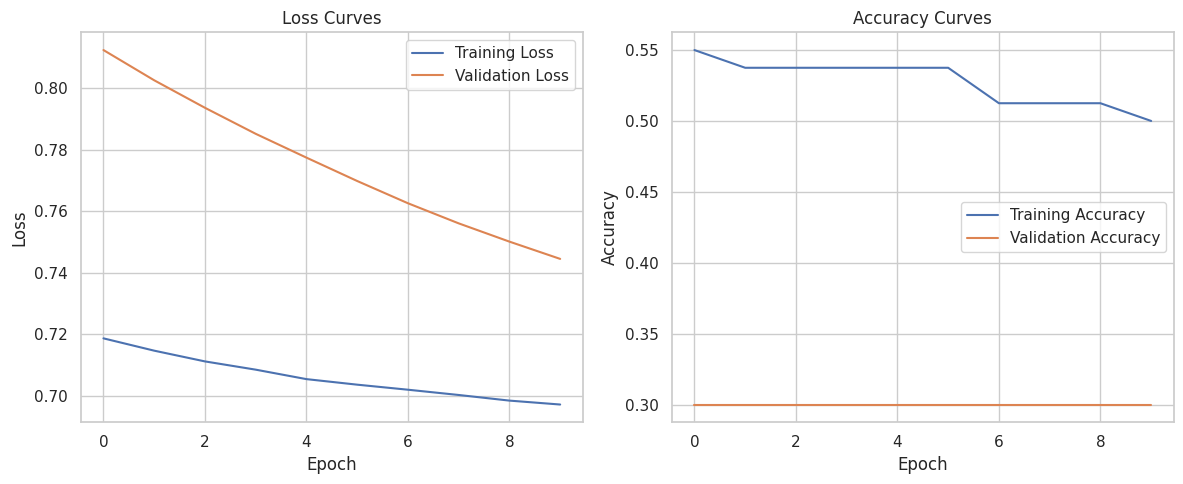

{'accuracy': [0.550000011920929, 0.5375000238418579, 0.5375000238418579, 0.5375000238418579, 0.5375000238418579, 0.5375000238418579, 0.512499988079071, 0.512499988079071, 0.512499988079071, 0.5], 'loss': [0.7187236547470093, 0.7147253155708313, 0.7112382650375366, 0.7085608243942261, 0.7054866552352905, 0.7036868929862976, 0.7020493745803833, 0.7003391981124878, 0.6985129117965698, 0.6972402930259705], 'val_accuracy': [0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896], 'val_loss': [0.8123184442520142, 0.802503228187561, 0.7935760617256165, 0.7851289510726929, 0.7773962616920471, 0.769809365272522, 0.762586236000061, 0.7560562491416931, 0.7501268982887268, 0.7445205450057983]}


In [112]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(5,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)

# Train the model with validation data
history = model.fit(X, y, epochs=10, validation_split=0.2)  # 20% validation split

# Plotting Function (No Changes Needed)
sns.set_theme(style='whitegrid', context='notebook')

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_history(history)


print(history.history)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4578 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4682 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4567 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4621 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4499 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4604 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4592 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4662 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

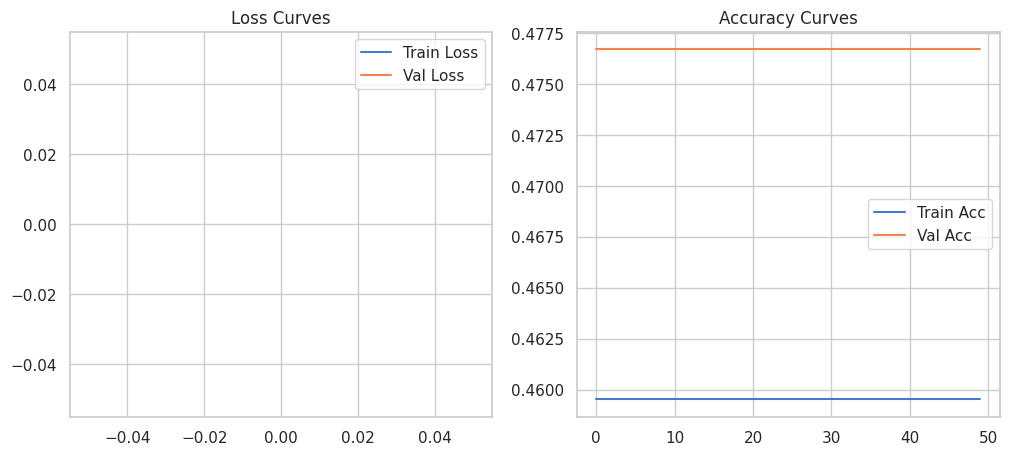

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


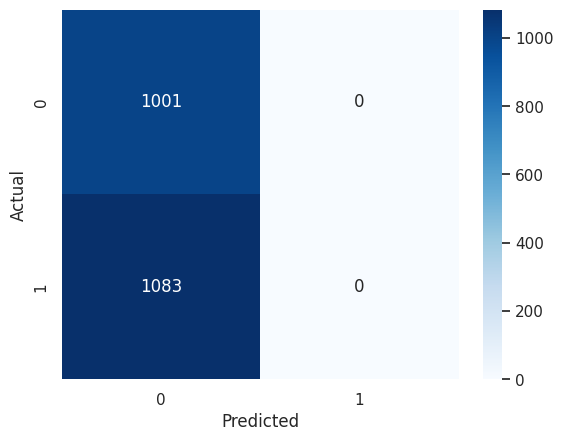


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
def define_model(optimizer='adam', regularization=None):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    # First hidden layer with optional regularization
    if regularization == 'l2':
        model.add(Dense(128, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01)))
    elif regularization == 'dropout':
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))
    else:
        model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile with different optimizers
    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = RMSprop(learning_rate=0.001)

    model.compile(optimizer=opt,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

#  train model with Adam + L2 regularization
model_2 = define_model('adam', 'l2')
history = model_2.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.legend()
plt.show()


y_pred = model_2.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print("\nTest Evaluation:")
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f} | Test Loss: {test_loss:.3f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test,y_pred_class))

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4602 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4595 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4634 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4640 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4619 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4717 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4588 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4537 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

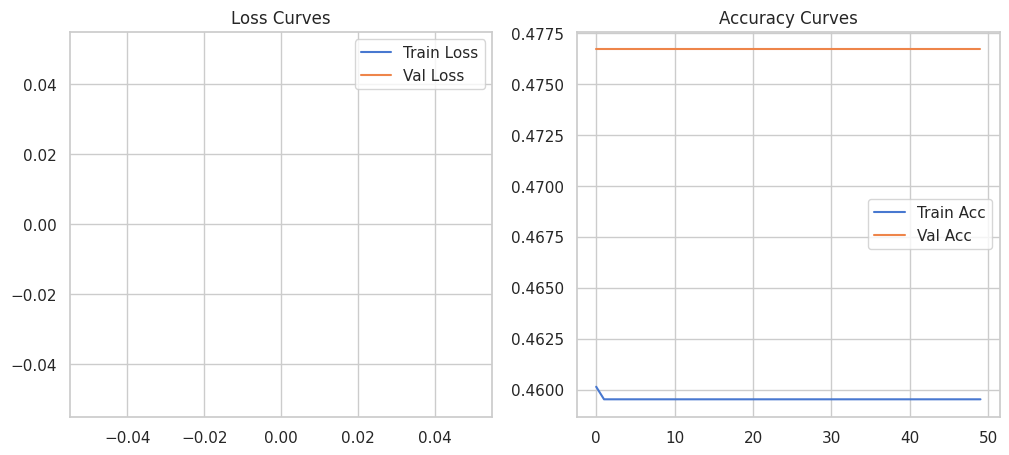

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4607 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4607 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4651 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4640 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4702 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4569 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4681 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4554 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

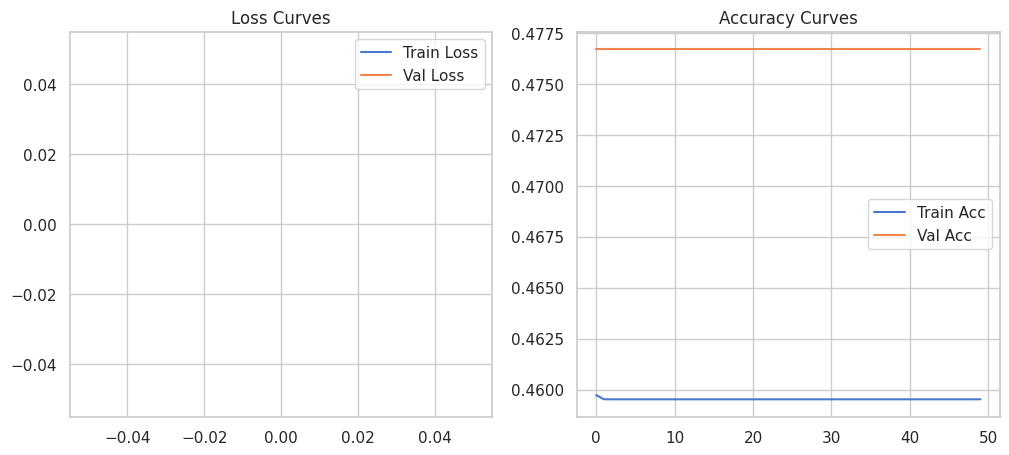

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4587 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4603 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4620 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4581 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4608 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4737 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4541 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4604 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

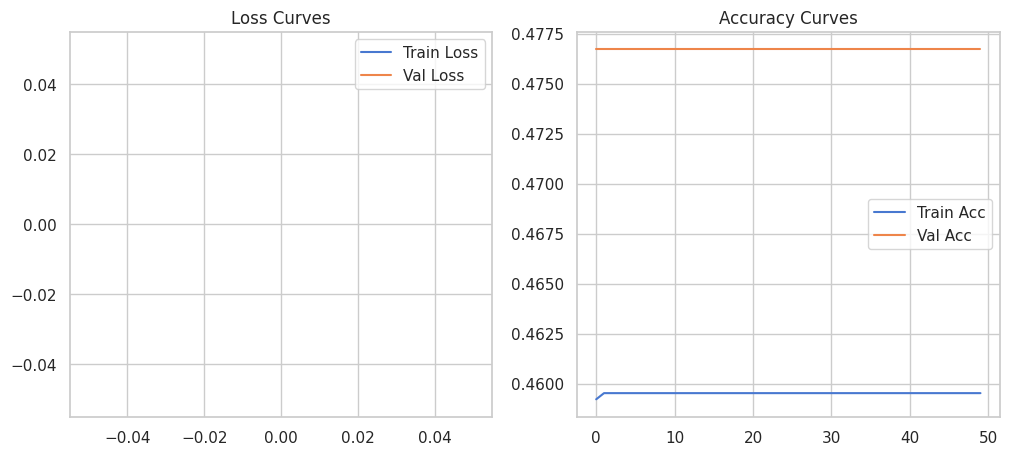


Adam L1 Results:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


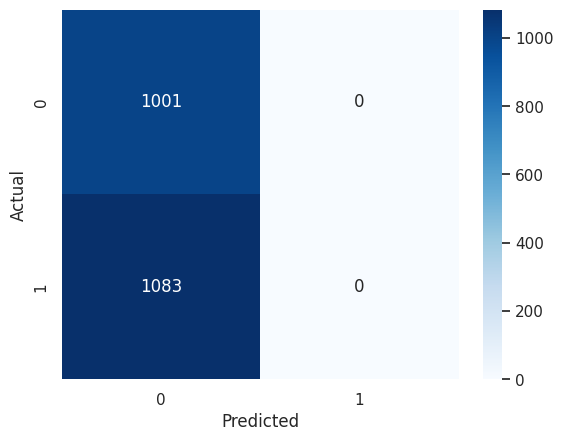


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084


RMSprop L2 Results:
47/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


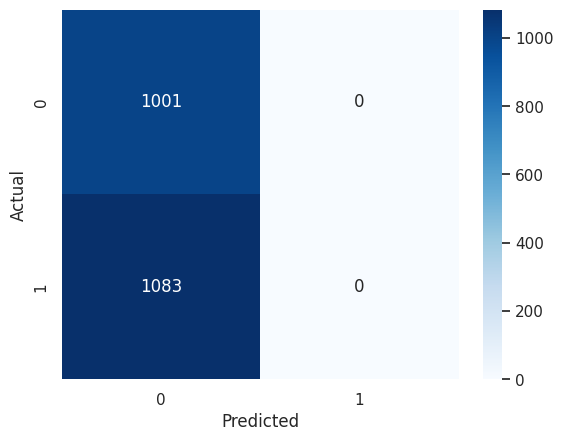


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084


SGD Dropout Results:
47/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


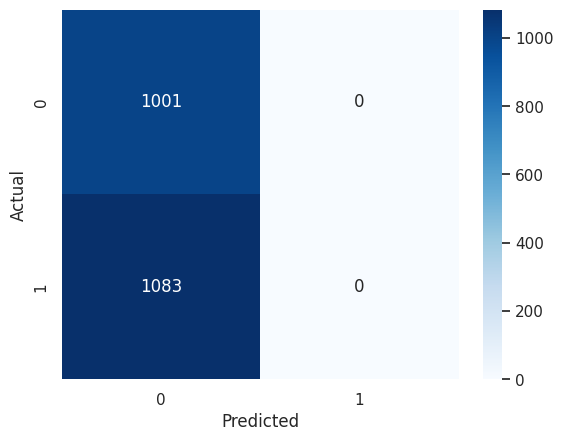


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



def define_model(optimizer='adam', regularization=None, dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train_processed.shape[1],)))

    if regularization == 'l1':
        model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(128, activation='relu'))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = Adam(learning_rate=0.001)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

# Model 1: Adam with L1 regularization
model_adam_l1 = define_model('adam', 'l1')
history_adam_l1 = model_adam_l1.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val), verbose=1)
plot_training_history(history_adam_l1)

# Model 2: RMSprop with L2 regularization
model_rmsprop_l2 = define_model('rmsprop', 'l2')
history_rmsprop_l2 = model_rmsprop_l2.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val), verbose=1)
plot_training_history(history_rmsprop_l2)

# Model 3: SGD with Dropout
model_sgd_dropout = define_model('sgd', dropout_rate=0.3)
history_sgd_dropout = model_sgd_dropout.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val), verbose=1)
plot_training_history(history_sgd_dropout)


def evaluate_and_analyze(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype("int32")

    print("\nTest Evaluation:")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.3f} | Test Loss: {test_loss:.3f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_class)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))


print("\nAdam L1 Results:")
evaluate_and_analyze(model_adam_l1, X_test_processed, y_test)

print("\nRMSprop L2 Results:")
evaluate_and_analyze(model_rmsprop_l2, X_test_processed, y_test)

print("\nSGD Dropout Results:")
evaluate_and_analyze(model_sgd_dropout, X_test_processed, y_test)

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4621 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4616 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4686 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4597 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4633 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4644 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4593 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4605 - loss: nan - val_accuracy: 0.4767 - val_loss: nan
Epoch 9/50
304/304 ━━━━━

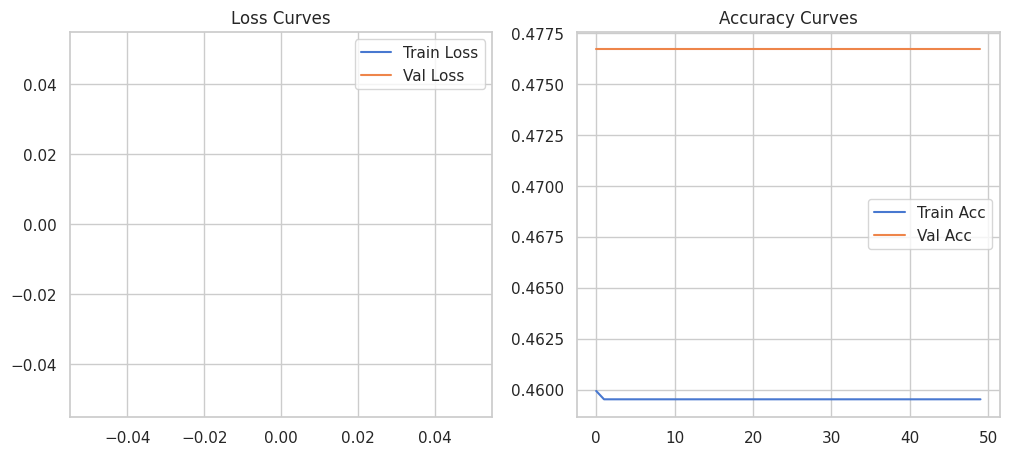


Adam No Regularization Results:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test Evaluation:
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: nan
Test Accuracy: 0.480 | Test Loss: nan

Confusion Matrix:


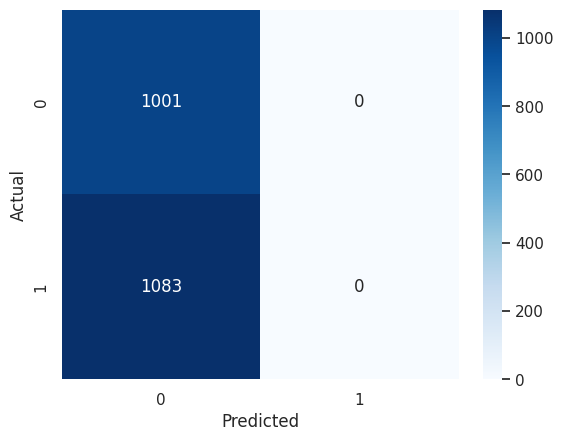


Classification Report:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65      1001
           1       0.00      0.00      0.00      1083

    accuracy                           0.48      2084
   macro avg       0.24      0.50      0.32      2084
weighted avg       0.23      0.48      0.31      2084



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report



def define_model(optimizer='adam', regularization=None, dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train_processed.shape[1],)))

    if regularization == 'l1':
        model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(128, activation='relu'))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    if optimizer.lower() == 'adam':
        opt = Adam(learning_rate=0.001)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=0.001)
    elif optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = Adam(learning_rate=0.001)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

def evaluate_and_analyze(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype("int32")

    print("\nTest Evaluation:")
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.3f} | Test Loss: {test_loss:.3f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_class)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_class))

# Model 4: Adam with no regularization
model_4 = define_model()
history_4 = model_4.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val), verbose=1)
plot_training_history(history_4)


print("\nAdam No Regularization Results:")
evaluate_and_analyze(model_4, X_test_processed, y_test)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


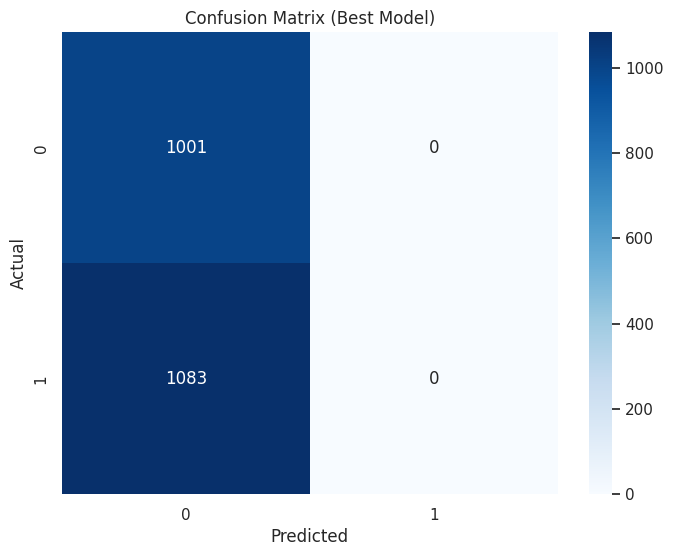

F1 Score (Best Model): 0.0000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


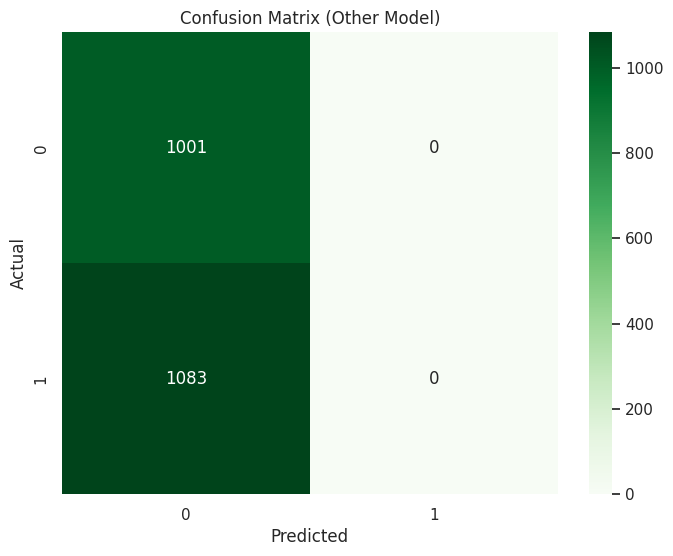

F1 Score (Other Model): 0.0000


In [83]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



def make_predictions(model_path, X):

    model = load_model(model_path)

    predictions = model.predict(X)

    binary_predictions = (predictions > 0.5).astype("int32")
    return binary_predictions


best_model_path = "saved_models/nn_adam_early_stop.h5"


predictions = make_predictions(best_model_path, X_test_processed)


cm = confusion_matrix(y_test, predictions)


f1 = f1_score(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()


print(f"F1 Score (Best Model): {f1:.4f}")


other_model_path = "saved_models/nn_adam_l2_regularized.h5"
other_predictions = make_predictions(other_model_path, X_test_processed)
other_cm = confusion_matrix(y_test, other_predictions)
other_f1 = f1_score(y_test, other_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(other_cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Other Model)')
plt.show()

print(f"F1 Score (Other Model): {other_f1:.4f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


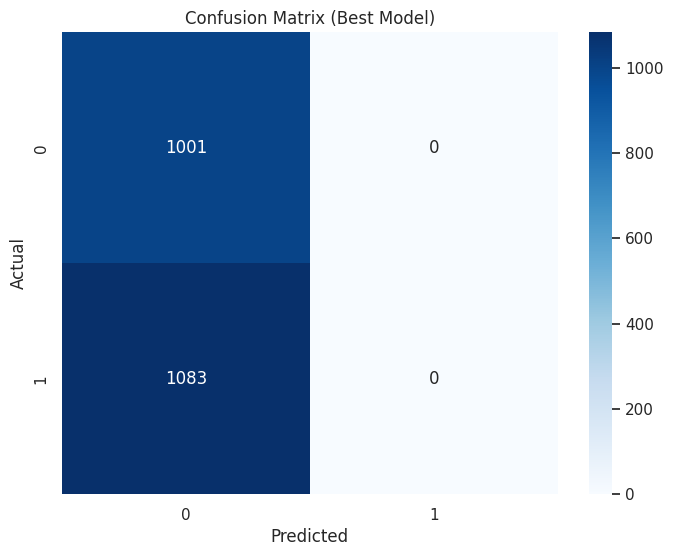

F1 Score (Best Model): 0.0000
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


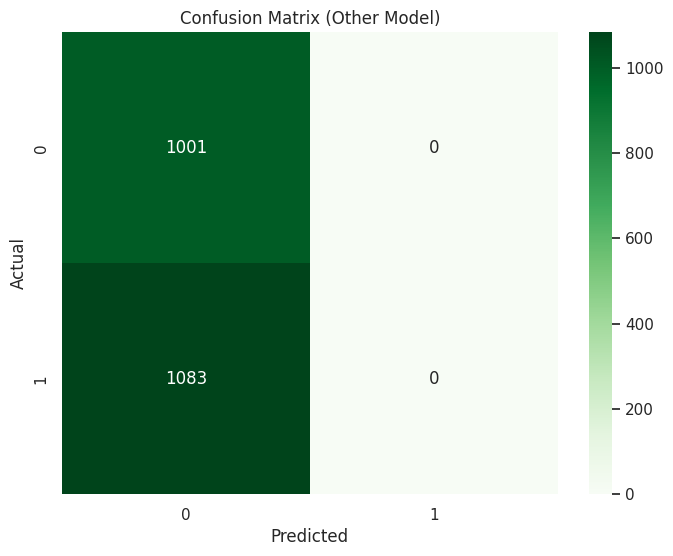

F1 Score (Other Model): 0.0000


In [82]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


def make_predictions(model_path, X):
    """
    Loads a model from the specified path, makes predictions,
    and returns the binary predictions.
    """
    try:
        model = load_model(model_path)

        predictions = model.predict(X)

        binary_predictions = (predictions > 0.5).astype("int32")
        return binary_predictions
    except Exception as e:
        print(f"Error loading or predicting with model: {e}")
        return None  # Return None in case of error

#  model_4 (Adam with no regularization)
model_path = "saved_models/nn_adam_early_stop.h5"

# predictions using the loaded model
predictions = make_predictions(model_path, X_test_processed)

if predictions is not None:
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Calculate F1 score
    f1 = f1_score(y_test, predictions)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Best Model)')
    plt.show()

    # Print F1 score
    print(f"F1 Score (Best Model): {f1:.4f}")
else:
    print("Predictions could not be generated due to an error.")

#another model
model_path_2 = "saved_models/nn_adam_l2_regularized.h5"
predictions_2 = make_predictions(model_path_2, X_test_processed)

if predictions_2 is not None:
    cm_2 = confusion_matrix(y_test, predictions_2)
    f1_2 = f1_score(y_test, predictions_2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_2, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix (Other Model)')
    plt.show()
    print(f"F1 Score (Other Model): {f1_2:.4f}")

Congratulations!!
